In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset_pred_crime_quartier_date.csv')

df

,QUARTIER,DATE,101,103,104,105,106,107,109,110,...,578,675,676,677,678,NB_INFRACTION,dow,month,doy_sin,doy_cos
0,Allerton,2024-01-04,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3,1,0.068802,0.997630
1,Allerton,2024-02-04,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,6,2,0.566702,0.823923
2,Allerton,2024-04-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,4,0.999917,-0.012910
3,Allerton,2024-05-20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,5,0.655156,-0.755493
4,Allerton,2024-08-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,8,-0.863142,-0.504961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23154,Yankee Stadium-Macombs Dam Park,2025-03-14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,3,0.951057,0.309017
23155,Yankee Stadium-Macombs Dam Park,2025-03-18,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,3,0.970064,0.242850
23156,Yankee Stadium-Macombs Dam Park,2025-03-21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,3,0.981306,0.192452
23157,Yankee Stadium-Macombs Dam Park,2025-03-26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,3,0.994218,0.107381


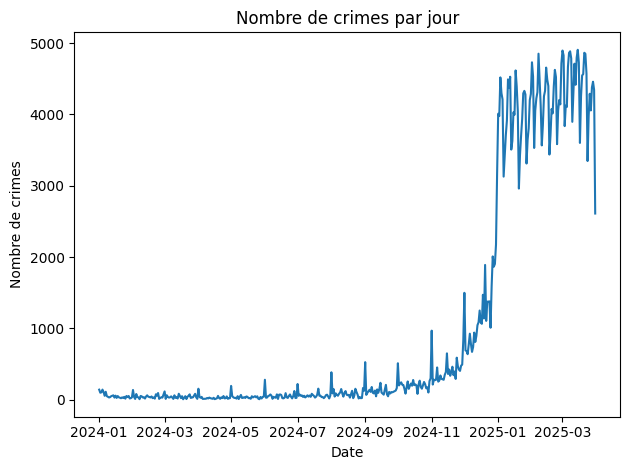

In [2]:
# Parsing de la date
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')

# Calcul du count total si nécessaire
code_cols = [c for c in df.columns if c not in ['QUARTIER', 'DATE']]
df[code_cols] = df[code_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['count'] = df[code_cols].sum(axis=1)

# 1. Nombre de crimes par jour
daily = df.groupby('DATE')['count'].sum().reset_index()

plt.figure()
plt.plot(daily['DATE'], daily['count'])
plt.title('Nombre de crimes par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de crimes')
plt.tight_layout()
plt.show()



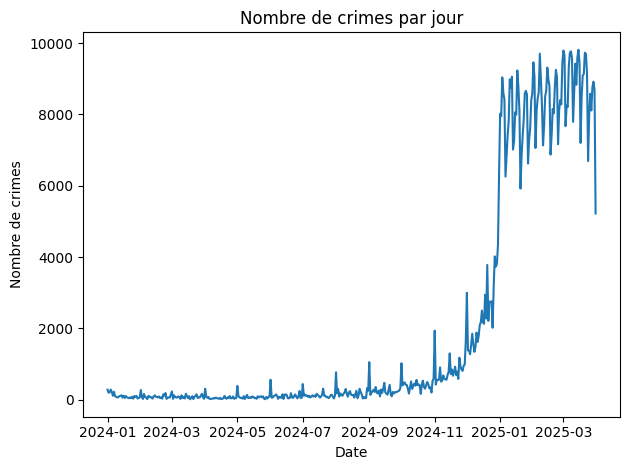

In [3]:
# il y a trop de disparités sur le nombre de crimes par années, supprimmer les lignes avec une date inférieure à 2024
df = df[df['DATE'].dt.year >= 2024]

df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d', errors='coerce')

# Calcul du count total si nécessaire
code_cols = [c for c in df.columns if c not in ['QUARTIER', 'DATE']]
df[code_cols] = df[code_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['count'] = df[code_cols].sum(axis=1)

# 1. Nombre de crimes par jour
daily = df.groupby('DATE')['count'].sum().reset_index()

plt.figure()
plt.plot(daily['DATE'], daily['count'])
plt.title('Nombre de crimes par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de crimes')
plt.tight_layout()
plt.show()

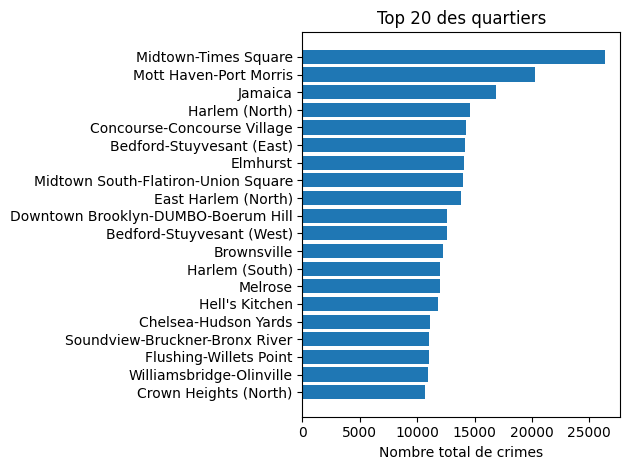

In [4]:
# 2. Nombre total de crimes par quartier
import pandas as pd
import matplotlib.pyplot as plt

# Calcul du total par quartier
code_cols = [c for c in df.columns if c not in ['QUARTIER','DATE']]
df[code_cols] = df[code_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df['count'] = df[code_cols].sum(axis=1)
qc = df.groupby('QUARTIER')['count'].sum().sort_values(ascending=False)

# Top 10 + Autres
top_n = 20
top = qc.head(top_n)
others = qc.iloc[top_n:].sum()
# labels = top.index.tolist() + ['Autres']
# values = top.tolist() + [others]
labels = top.index.tolist()
values = top.tolist()

# Trace horizontal
plt.figure()
plt.barh(labels, values)
plt.xlabel('Nombre total de crimes')
plt.title('Top 20 des quartiers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [5]:
# 3. Type d'infraction plus fréquent par jour
